In this assignment, students will be using the K-nearest neighbors
algorithm to predict how many points NBA players scored in the 2013-2014
season.

In [45]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
data=pd.read_csv("nba_2013.csv")
data



,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,...,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,...,183,277,40,23,46,63,187,328,2013-2014,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,Tony Wroten,SG,20,PHI,72,16,1765,345,808,0.427,...,159,228,217,78,16,204,151,939,2013-2014,2013
477,Nick Young,SG,28,LAL,64,9,1810,387,889,0.435,...,137,166,95,46,12,95,156,1144,2013-2014,2013
478,Thaddeus Young,PF,25,PHI,79,78,2718,582,1283,0.454,...,310,476,182,167,36,165,213,1417,2013-2014,2013
479,Cody Zeller,C,21,CHA,82,3,1416,172,404,0.426,...,235,353,92,40,41,87,170,490,2013-2014,2013


In [47]:
data.describe()

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,orb,drb,trb,ast,stl,blk,tov,pf,pts,season_end
count,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,479.000000,481.000000,481.000000,414.000000,...,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.0
mean,26.509356,53.253638,25.571726,1237.386694,192.881497,424.463617,0.436436,39.613306,110.130977,0.285111,...,55.810811,162.817048,218.627859,112.536383,39.280665,24.103950,71.862786,105.869023,516.582121,2013.0
std,4.198265,25.322711,29.658465,897.258840,171.832793,368.850833,0.098672,50.855639,132.751732,0.157633,...,62.101191,145.348116,200.356507,131.019557,34.783590,30.875381,62.701690,71.213627,470.422228,0.0
min,19.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2013.0
25%,23.000000,32.000000,0.000000,388.000000,47.000000,110.000000,0.400500,0.000000,3.000000,0.234355,...,12.000000,43.000000,55.000000,20.000000,9.000000,4.000000,21.000000,44.000000,115.000000,2013.0
50%,26.000000,61.000000,10.000000,1141.000000,146.000000,332.000000,0.438000,16.000000,48.000000,0.330976,...,35.000000,135.000000,168.000000,65.000000,32.000000,14.000000,58.000000,104.000000,401.000000,2013.0
75%,29.000000,76.000000,54.000000,2016.000000,307.000000,672.000000,0.479500,68.000000,193.000000,0.375000,...,73.000000,230.000000,310.000000,152.000000,60.000000,32.000000,108.000000,158.000000,821.000000,2013.0
max,39.000000,83.000000,82.000000,3122.000000,849.000000,1688.000000,1.000000,261.000000,615.000000,1.000000,...,440.000000,783.000000,1114.000000,721.000000,191.000000,219.000000,295.000000,273.000000,2593.000000,2013.0


In [48]:
data.player.value_counts()

Daniel Orton              1
Dwyane Wade               1
Greg Smith                1
LaMarcus Aldridge         1
Michael Kidd-Gilchrist    1
                         ..
Carl Landry               1
Perry Jones               1
Tyreke Evans              1
Tony Allen                1
Thomas Robinson           1
Name: player, Length: 481, dtype: int64

<AxesSubplot:>

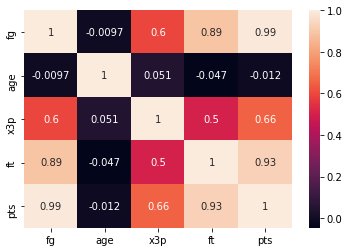

In [49]:
sns.heatmap(data[['fg','age','x3p','ft','pts']].corr(),annot=True)

Points made my a player is highly correlated to :
    
Field goals - 99%

Free Throws made (93%)

66% with 3 point shots

Age is not a factor when considering Points

In [50]:
## let us cluster the players using KMeans clustering method
from sklearn.cluster import KMeans
kmean_model = KMeans(n_clusters = 5,random_state = 41)
num_columns = data._get_numeric_data().dropna(axis=1)
kmean_model.fit(num_columns)
labels=kmean_model.labels_
print(labels)

[4 4 4 2 4 1 2 4 3 3 3 1 3 3 0 4 3 2 1 4 0 1 4 4 0 1 4 1 1 1 3 3 0 3 1 0 3
 2 3 1 4 2 4 0 4 3 1 1 4 3 3 3 3 1 1 3 4 3 0 2 0 3 0 1 3 1 1 1 1 4 1 0 0 3
 0 1 1 4 4 4 0 3 1 0 0 2 3 0 3 0 1 1 4 1 1 3 1 0 4 2 1 2 1 1 0 0 4 3 1 1 2
 3 1 1 1 2 4 3 1 1 1 4 0 2 0 4 4 4 2 2 3 0 0 2 1 1 2 1 4 4 0 0 4 1 0 1 3 1
 3 3 0 1 1 4 0 4 4 4 0 0 2 4 2 0 3 1 1 1 1 1 0 2 4 1 3 3 0 2 4 2 1 4 1 4 3
 2 3 1 1 4 1 1 1 0 4 0 4 2 0 4 0 0 0 3 0 3 1 0 4 1 1 4 2 4 3 2 3 3 2 1 0 0
 1 1 1 2 1 1 1 2 0 1 2 4 0 4 4 2 1 0 1 1 4 1 0 0 4 4 0 1 3 3 4 2 0 3 1 1 4
 3 1 1 0 1 0 2 1 0 1 4 4 1 2 0 3 4 0 2 2 1 3 4 0 3 4 4 0 1 2 1 1 3 4 4 1 1
 0 0 0 1 0 4 4 4 3 4 3 2 1 1 2 3 1 3 0 3 4 1 3 1 1 1 1 1 1 1 4 1 0 4 2 1 2
 1 4 4 1 0 3 1 1 4 3 1 0 2 3 0 0 4 0 1 3 0 1 1 1 4 1 1 4 3 1 1 1 2 4 1 4 3
 1 3 4 4 4 1 0 0 1 4 3 4 4 3 3 3 4 0 1 1 3 4 4 0 1 1 1 1 1 4 0 4 2 4 1 4 3
 1 2 4 1 3 0 0 4 1 2 1 3 4 1 1 1 2 1 1 3 3 2 0 3 1 4 0 4 1 2 1 4 4 0 3 1 3
 4 1 0 1 0 0 2 2 3 1 4 1 1 0 2 3 1 1 0 3 4 3 3 3 1 4 4 3 1 4 1 4 0 0 2 3 4]


In [51]:
data['Cluster']=labels.tolist()

In [52]:
data.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,trb,ast,stl,blk,tov,pf,pts,season,season_end,Cluster
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,216,28,23,26,30,122,171,2013-2014,2013,4
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,332,43,40,57,71,203,265,2013-2014,2013,4
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,306,38,24,36,39,108,362,2013-2014,2013,4
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,...,262,248,35,3,146,136,1330,2013-2014,2013,2
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,...,277,40,23,46,63,187,328,2013-2014,2013,4


In [53]:
data.loc[data['Cluster'] == 1,:]

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,trb,ast,stl,blk,tov,pf,pts,season,season_end,Cluster
5,Cole Aldrich,C,25,NYK,46,2,330,33,61,0.541,...,129,14,8,30,18,40,92,2013-2014,2013,1
11,Louis Amundson,PF,31,TOT,19,0,185,16,32,0.500,...,55,6,9,11,14,49,38,2013-2014,2013,1
18,Joel Anthony,C,31,TOT,33,0,186,12,32,0.375,...,38,2,3,12,3,17,28,2013-2014,2013,1
21,Hilton Armstrong,C,29,GSW,15,1,97,9,19,0.474,...,47,5,4,4,6,11,25,2013-2014,2013,1
25,Gustavo Ayon,C,28,ATL,26,14,429,52,102,0.510,...,125,28,25,10,29,47,112,2013-2014,2013,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460,D.J. White,PF,27,CHA,2,0,10,0,1,0.000,...,2,0,1,0,0,1,0,2013-2014,2013,1
461,Royce White,PF,22,SAC,3,0,9,0,1,0.000,...,0,0,0,0,0,2,0,2013-2014,2013,1
468,Reggie Williams,SF,27,OKC,3,0,17,5,9,0.556,...,0,1,1,0,2,1,11,2013-2014,2013,1
472,Metta World Peace,SF,34,NYK,29,1,388,56,141,0.397,...,59,17,24,8,19,44,139,2013-2014,2013,1


In [54]:
cluster_map=pd.DataFrame()
cluster_map['player name']=data['player']
cluster_map['cluster_no'] = data['Cluster']

In [55]:
cluster_map.head()

,player name,cluster_no
0,Quincy Acy,4
1,Steven Adams,4
2,Jeff Adrien,4
3,Arron Afflalo,2
4,Alexis Ajinca,4


In [56]:
cluster_map.loc[cluster_map['cluster_no'] == 1 ,:]

,player name,cluster_no
5,Cole Aldrich,1
11,Louis Amundson,1
18,Joel Anthony,1
21,Hilton Armstrong,1
25,Gustavo Ayon,1
...,...,...
460,D.J. White,1
461,Royce White,1
468,Reggie Williams,1
472,Metta World Peace,1


## Lets Predict using KNN

In [57]:
new = data[['player','fta','fga','x3pa','pts']]
new

,player,fta,fga,x3pa,pts
0,Quincy Acy,53,141,15,171
1,Steven Adams,136,185,0,265
2,Jeff Adrien,119,275,0,362
3,Arron Afflalo,336,1011,300,1330
4,Alexis Ajinca,67,249,1,328
...,...,...,...,...,...
476,Tony Wroten,326,808,188,939
477,Nick Young,285,889,350,1144
478,Thaddeus Young,229,1283,292,1417
479,Cody Zeller,200,404,1,490


In [58]:
new.isnull().sum()

player    0
fta       0
fga       0
x3pa      0
pts       0
dtype: int64

In [59]:
new.describe()

,fta,fga,x3pa,pts
count,481.000000,481.000000,481.000000,481.000000
mean,120.642412,424.463617,110.130977,516.582121
std,131.240639,368.850833,132.751732,470.422228
min,0.000000,0.000000,0.000000,0.000000
25%,22.000000,110.000000,3.000000,115.000000
50%,73.000000,332.000000,48.000000,401.000000
75%,179.000000,672.000000,193.000000,821.000000
max,805.000000,1688.000000,615.000000,2593.000000


In [60]:
dummies = pd.get_dummies(new.player)
dummies.head(3)

,A.J. Price,Aaron Brooks,Aaron Gray,Adonis Thomas,Al Harrington,Al Horford,Al Jefferson,Al-Farouq Aminu,Alan Anderson,Alec Burks,...,Wayne Ellington,Wesley Johnson,Wesley Matthews,Will Barton,Will Bynum,Willie Green,Wilson Chandler,Xavier Henry,Zach Randolph,Zaza Pachulia
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
new1=pd.concat([new,dummies],axis=1)

In [69]:
new1.drop('player',axis=1,inplace= True)

In [70]:
new1

,fta,fga,x3pa,pts,A.J. Price,Aaron Brooks,Aaron Gray,Adonis Thomas,Al Harrington,Al Horford,...,Wayne Ellington,Wesley Johnson,Wesley Matthews,Will Barton,Will Bynum,Willie Green,Wilson Chandler,Xavier Henry,Zach Randolph,Zaza Pachulia
0,53,141,15,171,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,136,185,0,265,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,119,275,0,362,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,336,1011,300,1330,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,67,249,1,328,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,326,808,188,939,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
477,285,889,350,1144,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
478,229,1283,292,1417,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
479,200,404,1,490,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
X=new1.drop('pts',axis=1)

In [72]:
y=new1['pts']

In [73]:
print(X.shape)
print(y.shape)

(481, 484)
(481,)


In [74]:
X

,fta,fga,x3pa,A.J. Price,Aaron Brooks,Aaron Gray,Adonis Thomas,Al Harrington,Al Horford,Al Jefferson,...,Wayne Ellington,Wesley Johnson,Wesley Matthews,Will Barton,Will Bynum,Willie Green,Wilson Chandler,Xavier Henry,Zach Randolph,Zaza Pachulia
0,53,141,15,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,136,185,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,119,275,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,336,1011,300,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,67,249,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,326,808,188,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
477,285,889,350,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
478,229,1283,292,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
479,200,404,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 100)

In [76]:
from sklearn.neighbors import KNeighborsRegressor
kn_reg=KNeighborsRegressor()
kn_reg.fit(X_train,y_train)

KNeighborsRegressor()

In [77]:
kn_reg.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [78]:
# Training Score
kn_reg.score(X_train,y_train)

0.9876822171280025

In [79]:
# Testing Score
kn_reg.score(X_test,y_test)

0.9873198001673245

In [30]:
param_grid = { 'algorithm' : ['ball_tree', 'kd_tree', 'brute'],
               'leaf_size' : [18,20,25,27,30,32,34],
               'n_neighbors' : [3,5,7,9,10,11,12,13]
              }

In [31]:
from sklearn.model_selection import GridSearchCV
grid_search= GridSearchCV(kn_reg, param_grid,verbose=3)
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits
[CV 1/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=3; total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=3; total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=3; total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=3; total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=3; total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=5; total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=5; total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=5; total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=5; total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=5; total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=7; total time=   0.0s
[CV 2/5] END algorithm=ball_tree, l

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [18, 20, 25, 27, 30, 32, 34],
                         'n_neighbors': [3, 5, 7, 9, 10, 11, 12, 13]},
             verbose=3)

In [32]:
grid_search.best_params_

{'algorithm': 'ball_tree', 'leaf_size': 20, 'n_neighbors': 3}

In [80]:
knn=KNeighborsRegressor(algorithm = 'ball_tree', leaf_size = 20, n_neighbors = 3)
knn.fit(X_train,y_train)

KNeighborsRegressor(algorithm='ball_tree', leaf_size=20, n_neighbors=3)

In [81]:
# Training Score
knn.score(X_train,y_train)

0.9909120191130811

In [82]:
# Testing Score
knn.score(X_test,y_test)

0.9866197139113771

In [41]:
y_pred=knn.predict(X_test)

In [44]:
y_test

175     511
406     483
331     178
29      150
398      38
       ... 
310    1249
373     339
458    1118
189     315
444     197
Name: pts, Length: 97, dtype: int64

In [83]:
def predict_points(player,fta,fga,x3pa):    
    loc_index = np.where(X.columns==player)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = fta
    x[1] = fga
    x[2] = x3pa
    if loc_index >= 0:
        x[loc_index] = 1

    return np.round(knn.predict([x]))[0]

In [84]:
# predict the points of Kevin Durant, if he took 1010 free throws, 136 field goals attempt and 300 3 pointer shots
predict_points('Kevin Durant',1010,136,300)

926.0

In [86]:
predict_points('Adonis Thomas',600,136,300)

423.0